# Welcome! 
## by (Yousef Adel)
### In this notebook, I am going to analyze travel agency data for the 1st step in the hiring process for data analyst vacancy in MoneyFellows.

#### Context: 

##### This dataset is for a travel agency that receives booking from an online booking platform. The work process in this business model is as follows: 

- The client requests for a reservation
- The booking platforms communicate with agency sales to check for availability.
- The sales response whether  to move forward or to cancel.


------------------------------------------------------------------
#### Aims of this analysis: 
- Find out insights and patterns that are beneficial for the marketing and sales team. 
- use visualizations and presentations to communicate findings with shareholders and teams. 

------------------------------------------

#### This analysis work frame is going be as follows: 
- Running exploratory analysis to detect any problem with data
- Wrangle data to add needed columns and fix issues.
- Extracting initial insights & thoughts from the dataset using visualization & descriptive statistics 
- Summarizing The findings and suggestions in the end of the page




In [3]:
# import all packages and set plots to be embedded inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [109]:
#Importing data into Jupyter lab
df = pd.read_csv('sampled.csv')
df.head()

,request_id,confirmed,client_id,nation,arrival_date,departure_date,num_of_adults,num_of_children,price,currency_id,adwords,source_id,sub_id
0,806181796,0,123420484,Germany,2016-12-26,2017-01-02,2.0,NaN,NaN,NaN,0,99.0,0
1,38700156,0,839911394,Chile,2012-10-17,2012-10-24,2.0,NaN,NaN,NaN,0,29.0,17
2,992039421,0,62928855,United Kingdom,2016-05-15,2016-05-18,5.0,NaN,NaN,NaN,0,1.0,0
3,625114613,0,374952733,Argentina,2018-03-17,2018-03-17,2.0,NaN,NaN,NaN,0,94.0,8
4,647445179,0,600861297,Chile,2013-01-13,2013-01-13,NaN,NaN,NaN,NaN,0,5.0,0


In [8]:
#Unsing info method to detect data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   request_id       1000 non-null   int64  
 1   confirmed        1000 non-null   int64  
 2   client_id        1000 non-null   int64  
 3   nation           1000 non-null   object 
 4   arrival_date     974 non-null    object 
 5   departure_date   974 non-null    object 
 6   num_of_adults    780 non-null    float64
 7   num_of_children  113 non-null    float64
 8   price            329 non-null    float64
 9   currency_id      329 non-null    float64
 10  adwords          1000 non-null   int64  
 11  source_id        986 non-null    float64
 12  sub_id           1000 non-null   int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 101.7+ KB


## Dataset columns 
- request_id (int64): The id of the request
- confirmed (int64): Boolean value the client has confirmed or not (needs to be tranformed to boolean type) (Our dependent variable)
- client_id (int64):  The id of the client
- nation (object): The home country of the client
- arrival_date (object): The arrival date of the client (needs to be tranformed to datestamp type) 
- departure_date (object): The departure date of the client (needs to be tranformed to datestamp type)
- num_of_adults (Float64): Number of adult persons 
- num_of_children (Float64): Number of children
- price (Float64) : the price of the reservation
- currency_id (float64): the currency used to pay
- adwords(int64): indicating whether this data originated from online advertising or not (needs to be tranformed to boolean type)
- source_id, sub_source_id: id of origin of request
---------------------------------------------------



# Data Wrangling:

In [110]:
df['adwords'].value_counts()

0    836
1    164
Name: adwords, dtype: int64

In [111]:
#Correcting data types for columns
#confirmed, adwords columns from int64 to boolen
f = {1 : True , 0 : False }

df['confirmed'] = df['confirmed'].map(f)
df['adwords'] = df['adwords'].map(f)


In [112]:
#Currency id from float to category
df['currency_id'] = df['currency_id'].astype('category')


In [113]:
#Giving every category a name rather than a number in currency_name coulmn 
df['currency_name'] = np.nan

df.loc[(df["currency_id"] == 2.0),"currency_name"] = 'USD'
df.loc[(df["currency_id"] == 1.0),"currency_name"] = 'EURO'
df.loc[(df["currency_id"] == 4.0),"currency_name"] = 'GBP'
df.loc[(df["currency_id"] == 3.0),"currency_name"] = 'EGP'


In [114]:
#Check for currency_name column
df['currency_name'].unique()

array([nan, 'USD', 'EURO', 'GBP', 'EGP'], dtype=object)

In [115]:
#Create converted_to_usd column which cotains all prices converted to unitied currency for analysis
df['converted_to_usd'] = np.nan
# Currency conversion according to the date 06/09/2020 
df.loc[(df["currency_id"] == 2.0),"converted_to_usd"] = df['price'] * 1
df.loc[(df["currency_id"] == 1.0),"converted_to_usd"] = df['price'] * 1.13
df.loc[(df["currency_id"] == 4.0),"converted_to_usd"] = df['price'] * 1.27
df.loc[(df["currency_id"] == 3.0),"converted_to_usd"] = df['price'] * 0.062 

In [116]:
#Check for name repition problem

df['nation'].unique()

array(['Germany', 'Chile', 'United Kingdom', 'Argentina', 'United States',
       'Uganda', 'India', 'Peru', 'Czech Republic', 'Mexico', 'Russia',
       'Canada', 'Portugal', 'France', 'Lesotho', 'Brazil', 'Kenya',
       'Philippines', 'Italy', 'Belgium', 'Spain', 'Saudi Arabia',
       'Australia', 'Japan', 'Egypt', 'Switzerland', 'Sweden', 'Thailand',
       'Malaysia', 'Colombia', 'South Africa', 'Costa Rica',
       'New Zealand', 'Trinidad and Tobago', 'Afghanistan', 'Ecuador',
       'Mauritius', 'Ireland', 'Swaziland', 'Singapore', 'Uruguay',
       'Netherlands', 'Greece', 'American Samoa', 'Algeria', 'Syria',
       'Oman', 'China', 'Bangladesh', 'Brunei', 'Ukraine', 'Pakistan',
       'Albania', 'Central African Republic', 'Bahrain', 'Romania',
       'United Arab Emirates', 'Austria', 'Turkey',
       'United States Virgin Islands', 'Jordan', 'Cuba',
       'Wallis and Futuna', 'Bahamas', 'Nicaragua', 'Morocco', 'Anguilla',
       'Venezuela', 'Armenia', 'Bolivia', 'Andorr

-------------------------------------
#  Insights Using  statistics and visualization

### As we can see here the highest countries are:
- United States
- Brazil
- United Kindom
- Italy
- India

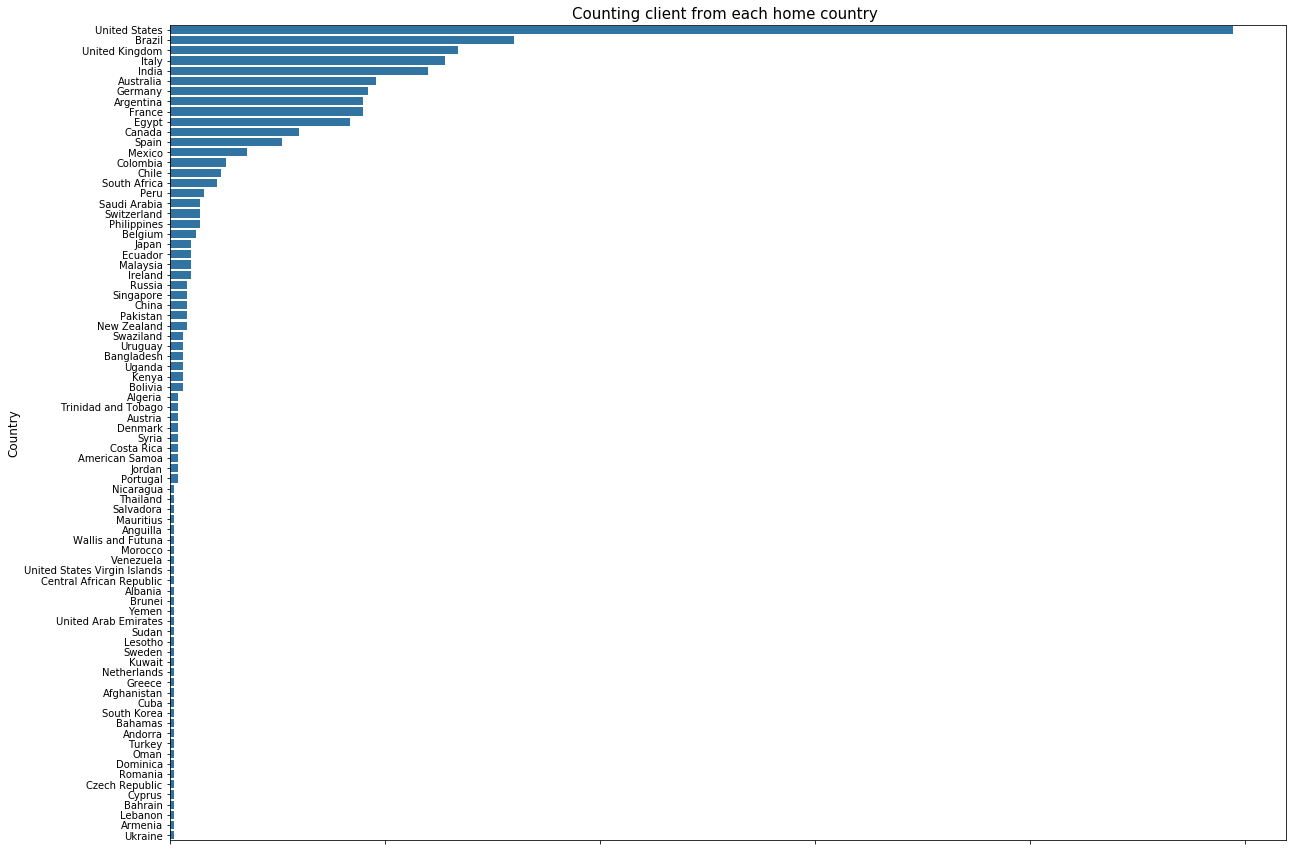

In [12]:
#Counting the highest nation 
plt.figure(figsize = (20,15))
base_color = sb.color_palette()[0]
ax = sb.countplot(y="nation",
                  data=df, color= base_color,
                  order = df['nation'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Counting client from each home country ", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Country", fontsize=12);

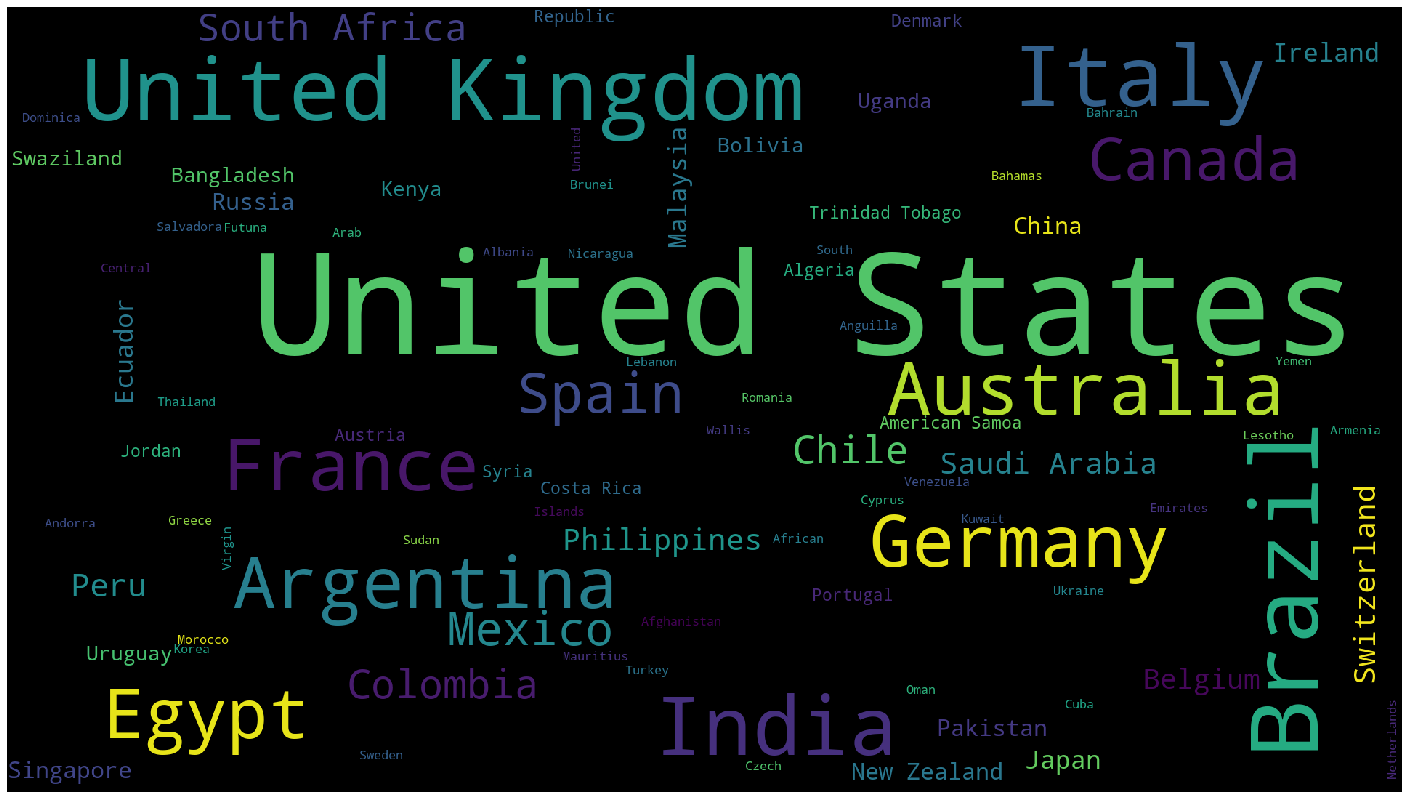

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.nation))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

### Counting the highest nation by confirm
## Frist five:
- United States  87
- United Kingdom  28
- Italy  25
- Australia  22
- Egypt  20

In [130]:
nations_by_confirm = df[['nation', 'confirmed']]
nations_by_confirm = nations_by_confirm.groupby('nation')['confirmed'].sum()
nations_by_confirm = pd.DataFrame(nations_by_confirm)
nations_by_confirm = nations_by_confirm.sort_values('confirmed', ascending=False)
nations_by_confirm= nations_by_confirm.reset_index()
for_plot= nations_by_confirm[:12]
nations_by_confirm.head(5)

,nation,confirmed
0,United States,87.0
1,United Kingdom,28.0
2,Italy,25.0
3,Australia,22.0
4,Egypt,20.0


Text(0, 0.5, 'Confirm Count')

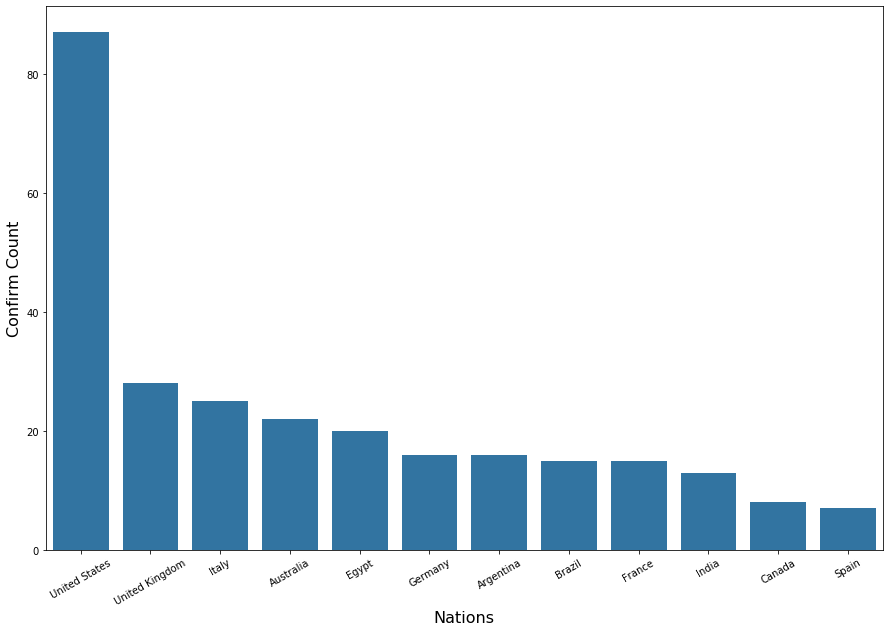

In [133]:
plt.figure(figsize=(15, 10))
base_color = sb.color_palette()[0]
ax = sb.barplot(data = for_plot, x = 'nation', y ='confirmed', color = base_color)
ax.set_xticklabels(labels= for_plot.nation, fontsize=10, rotation=30)
ax.set_xlabel(xlabel='Nations', fontsize=16)
ax.set_ylabel(ylabel='Confirm Count', fontsize=16)


### Counting the highest nation by sum of paid:
- United States 
- United Kingdom   
- Italy  
- Australia
- France

In [143]:
mean_price_by_nation = df[['nation', 'converted_to_usd']]
mean_price_by_nation = mean_price_by_nation.groupby('nation')['converted_to_usd'].sum()
mean_price_by_nation = pd.DataFrame(mean_price_by_nation)
mean_price_by_nation = mean_price_by_nation.sort_values('converted_to_usd', ascending=False)
mean_price_by_nation = mean_price_by_nation[:12]
mean_price_by_nation= mean_price_by_nation.reset_index()
mean_price_by_nation.head()


,nation,converted_to_usd
0,United States,4421.198
1,United Kingdom,1420.000
2,Italy,1179.720
3,Australia,1050.000
4,France,1031.300


Text(0, 0.5, 'Price mean')

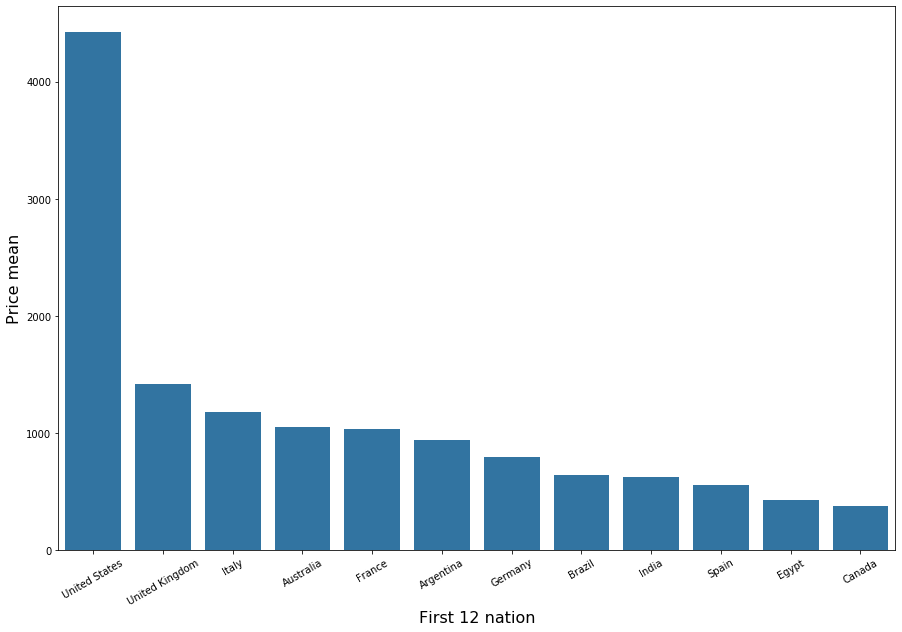

In [144]:
plt.figure(figsize=(15, 10))
base_color = sb.color_palette()[0]
ax = sb.barplot(data = mean_price_by_nation, x = 'nation', y ='converted_to_usd', color = base_color)
ax.set_xticklabels(labels= mean_price_by_nation.nation, fontsize=10, rotation=30)
ax.set_xlabel(xlabel='First 12 nation', fontsize=16)
ax.set_ylabel(ylabel='Price mean', fontsize=16)

---------------------------


### It is obvious that the number of unconfirmed reservation is higher than confirmed one, which may indicate one of the following problems:
- Pricing problems or lack of fair offers.
- Problems communicate with sales that slowing down the process.
- Sales performance is not good enough.

Note: There are many potential hypotheses for this client high unconfirmed rate which requires a deeper understanding of this business module and background 


In [15]:
df['confirmed'].value_counts()

False    675
True     325
Name: confirmed, dtype: int64

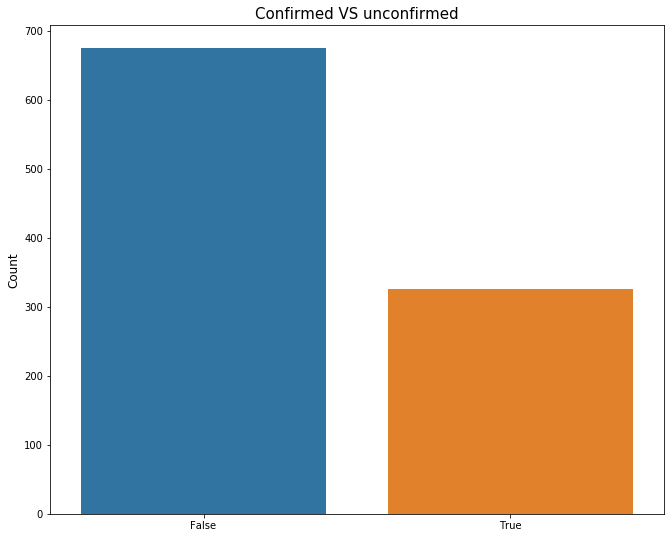

In [41]:
#Counting the the confirmed reservation agaist unconfirmed 
plt.figure(figsize = (11,9))
ax = sb.countplot(x="confirmed", data=df)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Confirmed VS unconfirmed", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Count", fontsize=12);

### AS shown in the plot below the Ads are not effective it may need reshaping  to enhance the engagement

In [14]:
df['adwords'].value_counts()

False    836
True     164
Name: adwords, dtype: int64

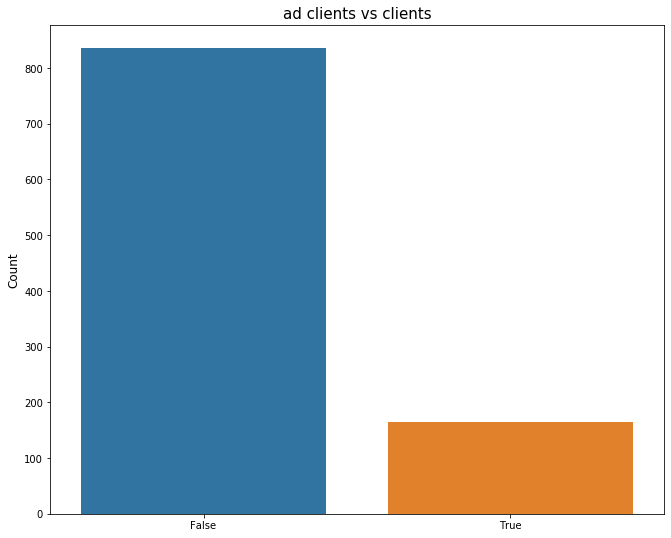

In [39]:
plt.figure(figsize = (11,9))
ax = sb.countplot(x="adwords", data=df)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("ad clients vs clients", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Count", fontsize=12);

### The highest currency used for paying is USD 

In [16]:
df['currency_name'].value_counts()

USD     224
EURO     63
GBP      23
EGP      19
Name: currency_name, dtype: int64

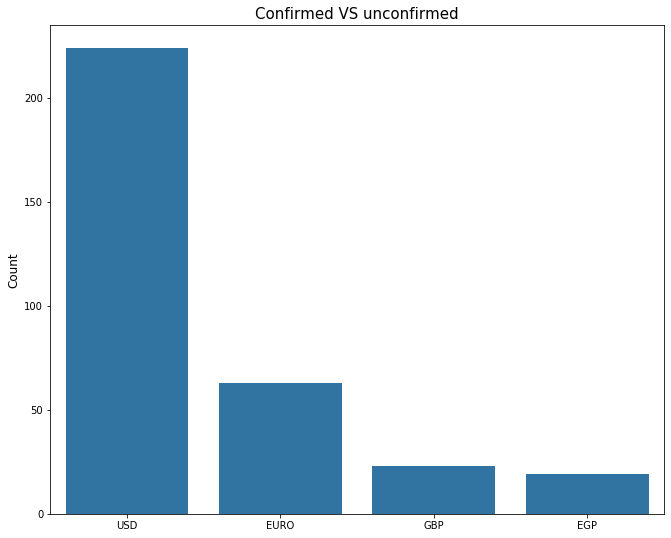

In [38]:
plt.figure(figsize = (11,9))
base_color = sb.color_palette()[0]
ax = sb.countplot(x="currency_name", data=df, color=base_color)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Confirmed VS unconfirmed", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Count", fontsize=12);

## Pricing Analysis

In [145]:
#Mean price for confirmed reservations 
df['converted_to_usd'].mean()

48.45494832826748

### The DISTRIBUITION of logarithmic prices is left-skewed


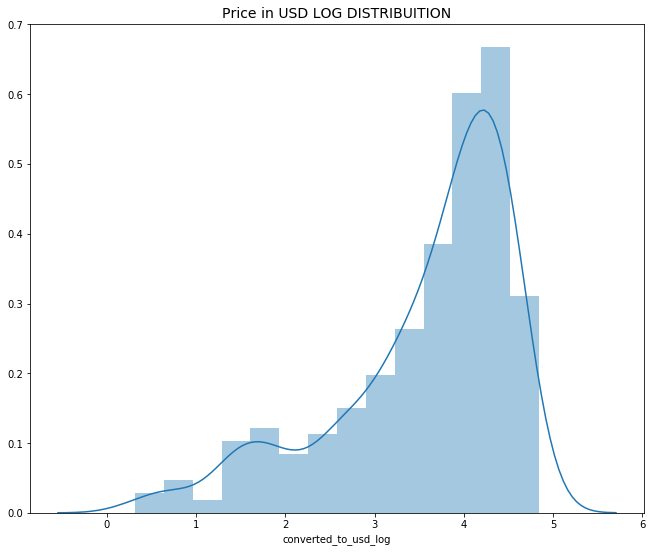

In [13]:
plt.figure(figsize = (11,9))
df['converted_to_usd_log'] = np.log(df['converted_to_usd'] + 1)
g1 = sb.distplot(df['converted_to_usd_log'])
g1.set_title("Price in USD LOG DISTRIBUITION", fontsize=14);

### Here I will use the binomial distribution to generate more random samples using the bootstrapping method to create 10000 estimates to determine the average price that people usually confirm upon
### (With 95% Confidence Intervals)

### The recommended Price segment that should sales and marketing team focus on is between 44.8 & 52.250 USD.


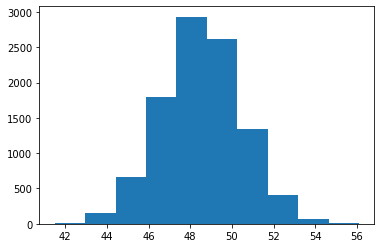

In [21]:
np.random.seed(42)

boot_means = []
for _ in range(10000):
    bootsamp = df.sample(800, replace = True)
    boot_mean = bootsamp[bootsamp['confirmed'] == True]['converted_to_usd'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means);

In [22]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(44.728832022262665, 52.28906049822063)

### Detecting the correlation between numarical variables in the dataset
#### Observations:
- Positive correlation between num_of_childern & price 
- Positive correlation between num_of_adults & price
- Negative correlation between confirmed & num_of_childern

In [12]:
df.corr()

,request_id,confirmed,client_id,num_of_adults,num_of_children,price,adwords,source_id,sub_id,converted_to_usd
request_id,1.000000,0.025500,0.023138,0.032951,0.152247,0.010820,-0.022695,-0.030006,-0.010218,-0.003913
confirmed,0.025500,1.000000,0.006708,-0.030038,-0.073876,-0.024626,-0.186245,-0.138134,-0.055457,0.029955
client_id,0.023138,0.006708,1.000000,0.036456,0.090989,-0.105133,0.005121,-0.001517,-0.027332,-0.077503
num_of_adults,0.032951,-0.030038,0.036456,1.000000,0.995497,0.115648,-0.027458,-0.038134,-0.042664,0.120913
num_of_children,0.152247,-0.073876,0.090989,0.995497,1.000000,0.227833,-0.051246,-0.096807,-0.074954,0.217977
price,0.010820,-0.024626,-0.105133,0.115648,0.227833,1.000000,-0.028909,0.007638,-0.008895,0.879135
adwords,-0.022695,-0.186245,0.005121,-0.027458,-0.051246,-0.028909,1.000000,0.273895,0.570223,-0.010306
source_id,-0.030006,-0.138134,-0.001517,-0.038134,-0.096807,0.007638,0.273895,1.000000,0.419545,0.003271
sub_id,-0.010218,-0.055457,-0.027332,-0.042664,-0.074954,-0.008895,0.570223,0.419545,1.000000,-0.062525
converted_to_usd,-0.003913,0.029955,-0.077503,0.120913,0.217977,0.879135,-0.010306,0.003271,-0.062525,1.000000


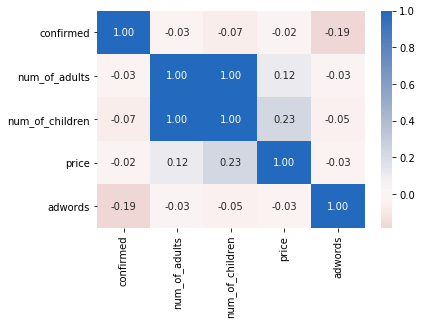

In [24]:
df2 = df[['confirmed', 'num_of_adults', 'num_of_children', 'price','adwords']]
sb.heatmap(df2.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)


# Findings summary:
- The highest 5 Nations are United state, Brazil, United Kingdom, Italy and India.
- The number of unconfirmed reservations is significantly higher than the confirmed one, we need to research more about: 
- Brazil is the 2th country in user rate yet the number of confrimed is small
- The number of clients who came from Ads is significantly small.
- The most currency used for payment process is USD.
- The best price segment that the clients confirm upon between 44.8 & 52.250 USD.
- Positive correlation between num_of_childern & price 
- Positive correlation between num_of_adults & price
- Negative correlation between confirmed & num_of_childern 


# Suggestions:
- The number of unconfirmed reservations is significantly higher than the confirmed. For example Brazil has many visitors to the website, yet the amount of confirmed reservation is relatively small.
    
- More information about advertising is needed to be measurable, like using different types of ads (Social media, search engine, Email, etc.). Furthermore, we can use two styles for each ad to determine which performance is  better, using a technique like A/B tests  


- The marketing team should focus on contries that we have a good presence but with a weak performance like Mexico and Colombia.


- The best segment price that people confirmed is between 44.8 & 52.250 US. This price category should have the attention of the marketing and sales teams.


- There is a relatively high negative correlation between unconfirmed and the number of children, which makes sense in general. Still, we should consider decreasing this by looking for ways to facilitate the presence of children, such as pricing or services. 



